## Exploratory Data Analysis



In [147]:
#imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

#regex
import re
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
cwd = os.getcwd()

df = pd.read_csv(cwd+"/cleaned-BA-reviews.csv", index_col=0)

In [4]:
df.head()

,reviews,stars,date,country,IsVerified,Cleaned Reviews,withoutstopwords,lemmatized_column,stemmed_text,stemmed_sentence
0,The plane was extremely dirty with chocolate...,5.0,2024-01-15,Ireland,True,The plane was extremely dirty with chocolate ...,plane extremely dirty chocolate smudged mine c...,plane extremely dirty chocolate smudged mine c...,"['plane', 'extreme', 'dirty', 'chocolate', 'sm...",plane extreme dirty chocolate smudg mine child...
1,Overall journey wasn’t bad however at the end...,1.0,2024-01-12,United Kingdom,False,Overall journey wasn t bad however at the end...,Overall journey bad however end baggage arriva...,Overall journey bad however end baggage arriva...,"['Overall', 'journey', 'bad', 'however', 'end'...",Overall journey bad however end baggage arriva...
2,Overall very satisfied. Ground staff member ...,4.0,2024-01-12,United Kingdom,True,Overall very satisfied Ground staff member at...,Overall satisfied Ground staff member YVR extr...,Overall satisfied Ground staff member YVR extr...,"['Overall', 'satisfi', 'Ground', 'staff', 'mem...",Overall satisfi Ground staff member YVR extrem...
3,As always when I fly BA it was a total shamb...,9.0,2024-01-09,Spain,True,As always when I fly BA it was a total shambl...,always fly BA total shambles booked Manchester...,always fly BA total shamble booked Manchester ...,"['alway', 'f', 'BA', 'total', 'shamble', 'book...",alway f BA total shamble book Manchester Londo...
4,First time using BA business class but we we...,1.0,2024-01-07,United Kingdom,True,First time using BA business class but we wer...,First time using BA business class pleased ser...,First time using BA business class pleased ser...,"['First', 'time', 'us', 'BA', 'busines', 'clas...",First time us BA busines clas pleas service re...


In [6]:
df.shape

(3727, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3727 entries, 0 to 3733
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   reviews            3727 non-null   object 
 1   stars              3727 non-null   float64
 2   date               3727 non-null   object 
 3   country            3727 non-null   object 
 4   IsVerified         3727 non-null   bool   
 5   Cleaned Reviews    3727 non-null   object 
 6   withoutstopwords   3727 non-null   object 
 7   lemmatized_column  3727 non-null   object 
 8   stemmed_text       3727 non-null   object 
 9   stemmed_sentence   3727 non-null   object 
dtypes: bool(1), float64(1), object(8)
memory usage: 294.8+ KB


**What is the average overall rating given for British Airways?**

In [8]:
df.stars.mean()

4.722296753420982

In [9]:
df_ratings = pd.DataFrame(df.stars.value_counts())
df_ratings.rename(columns={'index':'Stars', 'stars':'total_counts'}, inplace=True)
df_ratings

,count
stars,
1.0,872
2.0,423
3.0,407
8.0,365
10.0,325
9.0,312
7.0,311
5.0,270
4.0,248


### Total Counts for each ratings

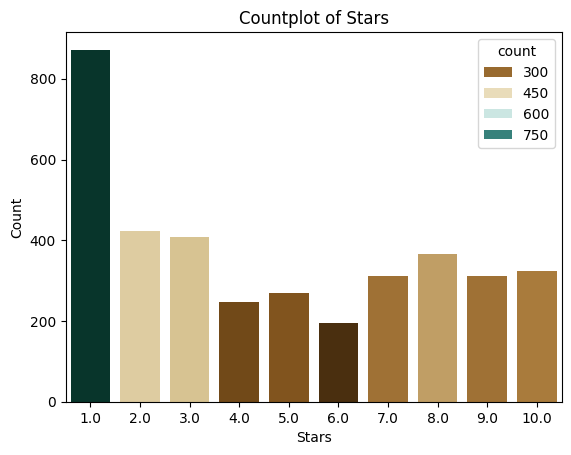

In [148]:
sns.barplot(x='stars', y='count', data=df_ratings, palette='BrBG', hue='count')
plt.title('Countplot of Stars')
plt.xlabel('Stars')
plt.ylabel('Count')
plt.show()

In [11]:
df.dtypes

reviews               object
stars                float64
date                  object
country               object
IsVerified              bool
Cleaned Reviews       object
withoutstopwords      object
lemmatized_column     object
stemmed_text          object
stemmed_sentence      object
dtype: object

### Sentiment Analysis using VADER

In [12]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['stemmed_sentence'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,stars,date,country,IsVerified,Cleaned Reviews,withoutstopwords,lemmatized_column,stemmed_text,stemmed_sentence,Sentiment,Analysis
0,The plane was extremely dirty with chocolate...,5.0,2024-01-15,Ireland,True,The plane was extremely dirty with chocolate ...,plane extremely dirty chocolate smudged mine c...,plane extremely dirty chocolate smudged mine c...,"['plane', 'extreme', 'dirty', 'chocolate', 'sm...",plane extreme dirty chocolate smudg mine child...,-0.8687,Negative
1,Overall journey wasn’t bad however at the end...,1.0,2024-01-12,United Kingdom,False,Overall journey wasn t bad however at the end...,Overall journey bad however end baggage arriva...,Overall journey bad however end baggage arriva...,"['Overall', 'journey', 'bad', 'however', 'end'...",Overall journey bad however end baggage arriva...,-0.5267,Negative
2,Overall very satisfied. Ground staff member ...,4.0,2024-01-12,United Kingdom,True,Overall very satisfied Ground staff member at...,Overall satisfied Ground staff member YVR extr...,Overall satisfied Ground staff member YVR extr...,"['Overall', 'satisfi', 'Ground', 'staff', 'mem...",Overall satisfi Ground staff member YVR extrem...,0.7778,Positive
3,As always when I fly BA it was a total shamb...,9.0,2024-01-09,Spain,True,As always when I fly BA it was a total shambl...,always fly BA total shambles booked Manchester...,always fly BA total shamble booked Manchester ...,"['alway', 'f', 'BA', 'total', 'shamble', 'book...",alway f BA total shamble book Manchester Londo...,-0.8785,Negative
4,First time using BA business class but we we...,1.0,2024-01-07,United Kingdom,True,First time using BA business class but we wer...,First time using BA business class pleased ser...,First time using BA business class pleased ser...,"['First', 'time', 'us', 'BA', 'busines', 'clas...",First time us BA busines clas pleas service re...,0.9274,Positive


#### Counts of Positive, Negative and Neutral reviews

In [13]:
df.Analysis.value_counts()

Analysis
Positive    2199
Negative    1114
Neutral      414
Name: count, dtype: int64

### Pie Chart representing % division of reviews

([<matplotlib.patches.Wedge at 0x2275b3ed490>,
 [Text(-0.306952633939716, 1.05630491834388, 'Positive'),
  Text(-0.07273354519365319, -1.0975927438734108, 'Negative'),
  Text(1.0336971810509046, -0.3761251625289292, 'Neutral')],
 [Text(-0.16742870942166324, 0.5761663190966617, '59.0%'),
  Text(-0.039672842832901734, -0.5986869512036785, '29.9%'),
  Text(0.5638348260277661, -0.20515917956123408, '11.1%')])

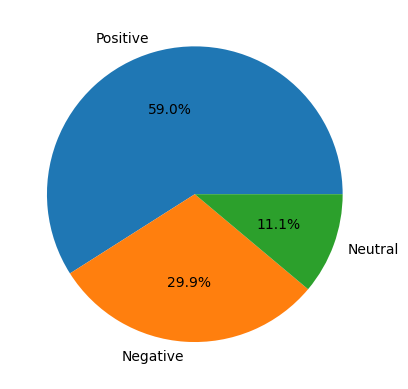

In [14]:
plt.pie(df.Analysis.value_counts(),labels = df.Analysis.value_counts().index, autopct='%1.1f%%')

### Word Cloud

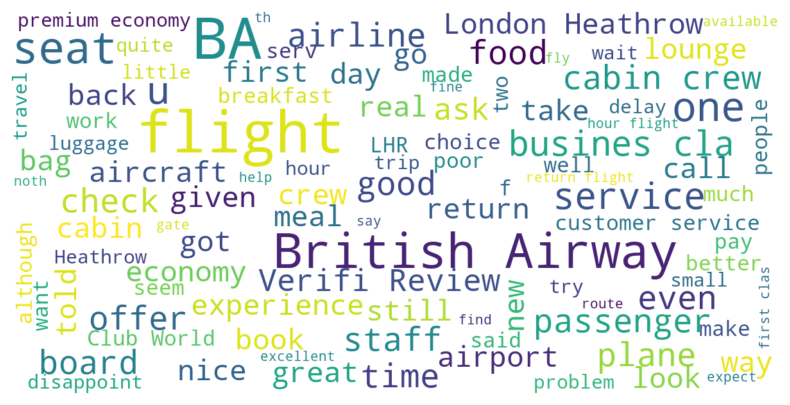

In [18]:
from wordcloud import WordCloud

# Assuming df is your DataFrame and 'text_column' is the column with text data
text_data = " ".join(df['stemmed_sentence'].astype(str))

# Generate WordCloud
wordcloud = WordCloud(background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3).generate(text_data)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

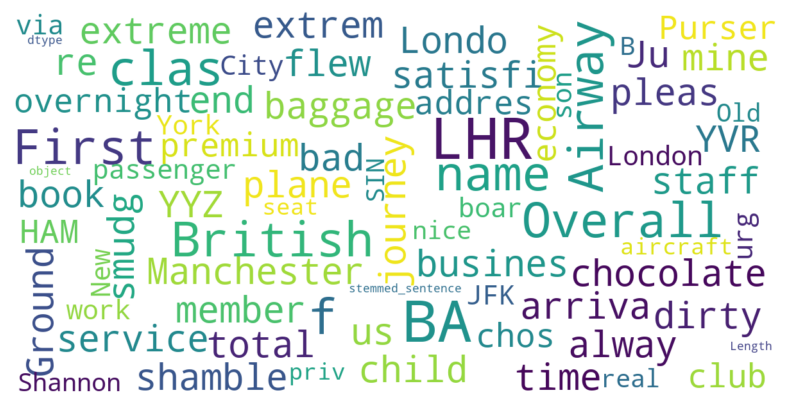

In [17]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(10, 5))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

show_wordcloud(df.stemmed_sentence)

In [32]:
df.isnull().value_counts()

reviews  stars  date   country  IsVerified  Cleaned Reviews  withoutstopwords  lemmatized_column  stemmed_text  stemmed_sentence  Sentiment  Analysis
False    False  False  False    False       False            False             False              False         False             False      False       3727
Name: count, dtype: int64

In [33]:
df_country_review = pd.DataFrame(df.country.value_counts().head()).reset_index()

In [34]:
df_country_review

,country,count
0,United Kingdom,2342
1,United States,418
2,Australia,158
3,Canada,115
4,Germany,64


### Top 5 Countries with Highest Ratings

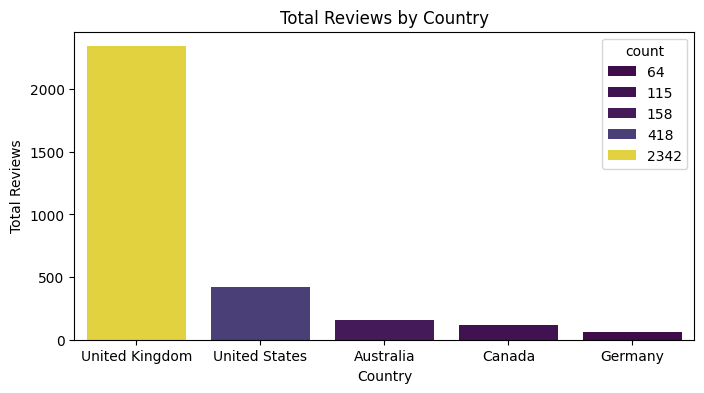

In [53]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(x='country', y='count', data=df_country_review, palette='viridis', hue='count')
plt.title('Total Reviews by Country')
plt.xlabel('Country')
plt.ylabel('Total Reviews')
plt.show()


In [68]:
df_country = pd.DataFrame(df.groupby('country')['stars'].mean().sort_values(ascending=False)).reset_index()

In [69]:
df_country

,country,stars
0,Indonesia,10.0
1,Jordan,10.0
2,Ecuador,10.0
3,Oman,9.0
4,Bahrain,9.0
...,...,...
67,Nigeria,1.5
68,Barbados,1.0
69,Trinidad & Tobago,1.0
70,Chile,1.0


In [71]:
df_country.rename(columns={'stars':'avg_rating'}, inplace=True)

### Top  Countries with avg highest rating provided to British Airways

Text(0.5, 1.0, 'Top  Countries with avg highest rating provided to British Airways')

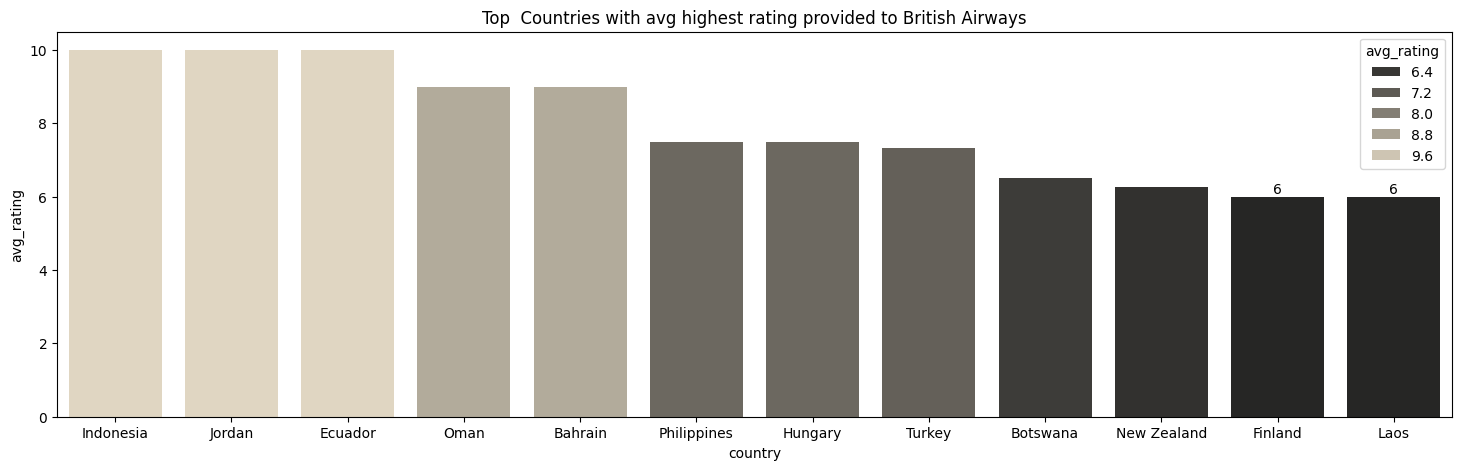

In [126]:
fig, ax = plt.subplots(figsize=(18,5))
ax1 = sns.barplot(x='country', y='avg_rating', data=df_country[:12], hue='avg_rating',palette='dark:#E5D8BD')
ax.bar_label(ax.containers[0])
ax.set_title("Top  Countries with avg highest rating provided to British Airways")

In [120]:
df_country.avg_rating.mean()

4.58382936457183

### Word Frequency

In [155]:
from nltk import FreqDist
import pandas as pd

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'reviews' is your Pandas Series containing text data
# Example:
# reviews = df['reviews_column']

# Remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', "passenger", "u", "london", "airway", "british", "airline", \
                                           "heathrow", "plane", "lhr", "review"])

# Apply the split and stopwords removal to each element in the Series
new_words = df.stemmed_sentence.apply(lambda x: [word for word in x.split() if word.lower() not in stopwords])

# Flatten the list of lists into a single list
new_words_flat = [word for sublist in new_words for word in sublist]

# Calculate word frequencies
nlp_words = FreqDist(new_words_flat).most_common(20)

# Create a dataframe of these words and their frequencies
all_fdist = pd.Series(dict(nlp_words))

# Print or use the resulting DataFrame
print(all_fdist)


seat       4634
service    2779
time       2450
crew       2050
good       1983
food       1930
hour       1911
cabin      1761
clas       1505
board      1465
check      1462
staff      1436
offer      1233
busines    1171
drink      1156
return     1110
meal       1104
economy    1070
book        988
delay       982
dtype: int64


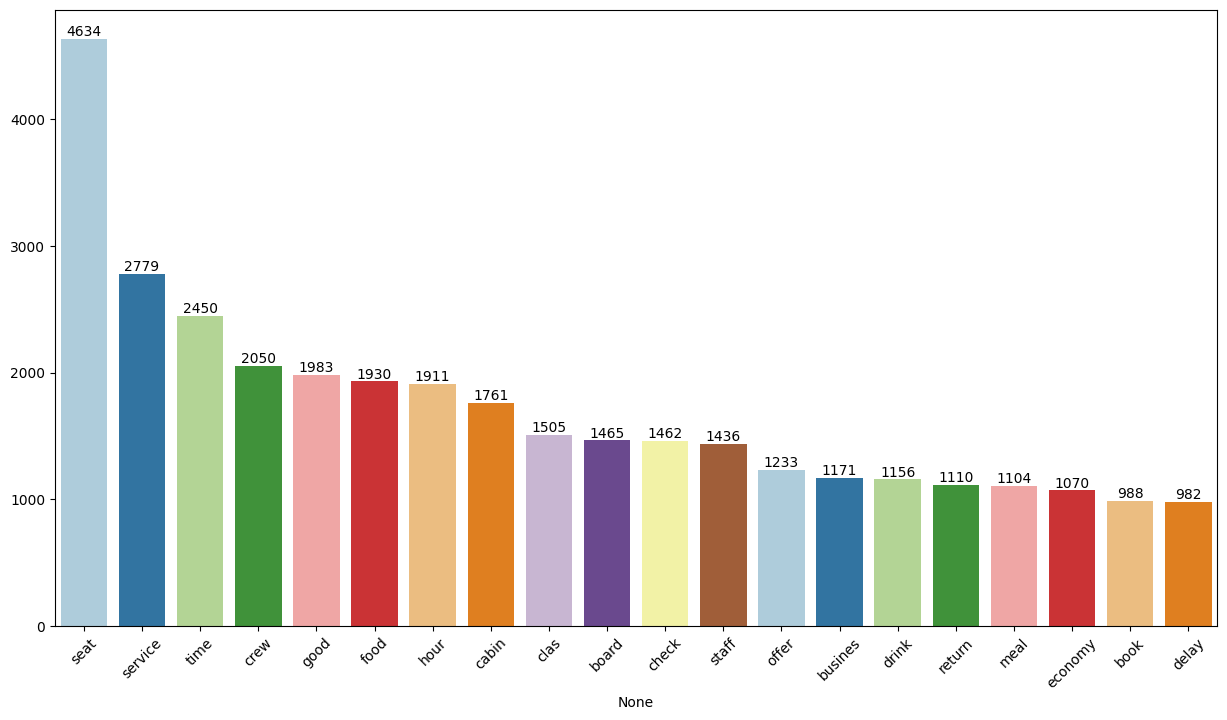

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15, 8))

# Create a color palette with the correct number of colors
colors = sns.color_palette("Paired", n_colors=20)

# Create the barplot using hue and disable legend
sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax, hue=all_fdist.index, palette=colors, legend=False)

for container in ax.containers:
    ax.bar_label(container)  # Label each individual bar
plt.xticks(rotation=45)
plt.show()
